In [106]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import cv2

In [107]:
image_size = 28
training_text = "Training -"
test_text = "Testing -"
relu_activation = 'relu'
softmax_activation = 'softmax'
optimizer_type = 'rmsprop'
loss_type = 'categorical_crossentropy'
metrics_type = 'accuracy'
batch_size = 256
epochs = 20

In [108]:
(x_train_origin, y_train_origin), (x_test_origin, y_test_origin) = tf.keras.datasets.mnist.load_data()

print(training_text, len(x_train_origin))
print(test_text, len(x_test_origin))

Training - 60000
Testing - 10000


0


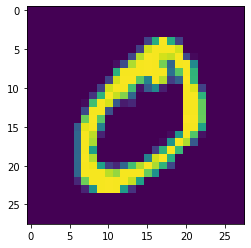

In [109]:
print(y_train_origin[1])
plt.imshow(x_train_origin[1])

In [110]:
x_train = x_train_origin.reshape((len(x_train_origin), image_size * image_size))
x_test = x_test_origin.reshape((len(x_test_origin), image_size * image_size))

In [111]:
# Normalizes images: `uint8` -> `float32`
# TFDS provide images of type tf.uint8, while the model expects
# tf.float32. Therefore, you need to normalize images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [112]:
# vector which has integers that represent different categories,
# can be converted into a numpy array (or) a matrix which has binary 
# values and has columns equal to the number of categories in the data

y_train = tf.keras.utils.to_categorical(y_train_origin)
y_test = tf.keras.utils.to_categorical(y_test_origin)

In [113]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation = relu_activation, input_shape = (image_size * image_size,)),
    keras.layers.Dense(10, activation = softmax_activation)
])
model.compile(optimizer = optimizer_type, loss = loss_type, metrics = [metrics_type])

In [114]:
model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size)
test_loss, test_acc = model.evaluate(x_test, y_test)

Epoch 1/20
235/235 [==============================] - 4s 15ms/step - loss: 0.3121 - accuracy: 0.9100
Epoch 2/20
235/235 [==============================] - 3s 15ms/step - loss: 0.1278 - accuracy: 0.9625
Epoch 3/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0836 - accuracy: 0.9759
Epoch 4/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0613 - accuracy: 0.9816
Epoch 5/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0466 - accuracy: 0.9863
Epoch 6/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0360 - accuracy: 0.9897
Epoch 7/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0285 - accuracy: 0.9919
Epoch 8/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0220 - accuracy: 0.9942
Epoch 9/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0175 - accuracy: 0.9955
Epoch 10/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0134 - accura

In [115]:
def get_images(image_name):
  image = 255-cv2.imread(image_name, 0)
  image_small = cv2.resize(image, (image_size, image_size))
  image_to_predict = image_small.reshape((1, image_size * image_size))

  return (image_small, image_to_predict)

In [116]:
def predict(image_to_predict):
  pred = model.predict(image_to_predict)[0]
  for x in range(10):
    if (pred[x] == 1.0):
      return x
    x = int(x) + 1

In [117]:
(first_image, image_to_predict) = get_images('3.png')
first_image_prediction = predict(image_to_predict)

(second_image, image_to_predict) = get_images('2.png')
second_image_prediction = predict(image_to_predict)

(third_image, image_to_predict) = get_images('0.png')
third_image_prediction = predict(image_to_predict)

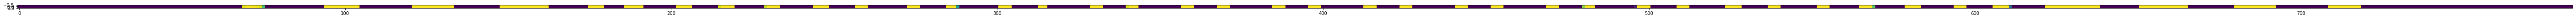

In [118]:
# the way We want to put Our image in model
fig = plt.figure()
fig.set_size_inches(100, 100)
imgplot = plt.imshow(image_to_predict)

Text(0.5, 1.0, '3')

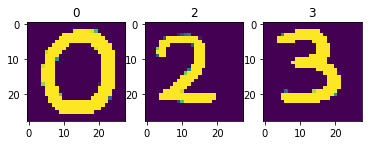

In [119]:
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(third_image)
ax.set_title(third_image_prediction)
ax = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(second_image)
ax.set_title(second_image_prediction)
ax = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(first_image)
ax.set_title(first_image_prediction)